In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import catboost
import random
import os
from catboost import CatBoostRegressor
import lightgbm as lgb
import torch

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, StratifiedKFold,TimeSeriesSplit 
from sklearn.metrics import accuracy_score, roc_auc_score
import optuna
from optuna import Trial
from optuna.samplers import TPESampler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Experiment

In [6]:
fig, axes = plt.subplots(1, 1, figsize=(50, 150))

data = [('assess_acc', 54.16398006266792),('test_relatvie_time', 43.67651642209658),('tag_cum_correct', 2.1595035152355146),
('userID', 0.0),('assessmentItemID', 0.0),('testId', 0.0),('Timestamp', 0.0),('KnowledgeTag', 0.0),('elo_prob', 0.0),
('user_cum_correct', 0.0),('user_cum_cnt', 0.0), ('user_acc', 0.0), ('user_mean', 0.0), ('total_count', 0.0), ('test_ans_mean', 0.0),
('test_ans_std', 0.0), ('test_ans_sum', 0.0), ('test_count', 0.0), ('test_cum_correct', 0.0), ('test_cum_cnt', 0.0), ('test_acc', 0.0),
('tag_ans_mean', 0.0), ('tag_ans_std', 0.0), ('tag_ans_sum', 0.0), ('tag_count', 0.0), ('tag_cum_cnt', 0.0), ('tag_acc', 0.0),
('prefix', 0.0), ('prefix_ans_mean', 0.0), ('prefix_ans_std', 0.0), ('prefix_ans_sum', 0.0), ('prefix_count', 0.0),
('prefix_cum_correct', 0.0), ('prefix_cum_cnt', 0.0), ('prefix_acc', 0.0), ('assess_ans_mean', 0.0), ('assess_ans_std', 0.0),
('assess_ans_sum', 0.0), ('assess_count', 0.0), ('assess_cum_correct', 0.0), ('assess_cum_cnt', 0.0), ('suffix', 0.0),
('suffix_ans_mean', 0.0), ('suffix_ans_std', 0.0), ('suffix_ans_sum', 0.0), ('suffix_count', 0.0), ('suffix_cum_correct', 0.0),
('suffix_cum_cnt', 0.0), ('suffix_acc', 0.0), ('weekday', 0.0), ('month', 0.0), ('day', 0.0), ('hour', 0.0), ('weekday_ans_mean', 0.0),
('weekday_ans_std', 0.0), ('weekday_ans_sum', 0.0), ('month_ans_mean', 0.0), ('month_ans_std', 0.0), ('month_ans_sum', 0.0),
('day_ans_mean', 0.0), ('day_ans_std', 0.0), ('day_ans_sum', 0.0), ('hour_ans_mean', 0.0), ('hour_ans_std', 0.0), ('hour_ans_sum', 0.0),
('elap_time', 0.0), ('user_time_mean', 0.0), ('user_time_std', 0.0), ('user_time_sum', 0.0), ('user_time_median', 0.0),
('test_time_mean', 0.0), ('test_time_std', 0.0), ('test_time_sum', 0.0), ('test_time_median', 0.0), ('tag_time_mean', 0.0),
('tag_time_std', 0.0), ('tag_time_sum', 0.0), ('tag_time_median', 0.0), ('prefix_time_mean', 0.0), ('prefix_time_std', 0.0),
('prefix_time_sum', 0.0), ('prefix_time_median', 0.0), ('assess_time_mean', 0.0), ('assess_time_std', 0.0), ('assess_time_sum', 0.0),
('assess_time_median', 0.0), ('suffix_time_mean', 0.0), ('suffix_time_std', 0.0), ('suffix_time_sum', 0.0), ('suffix_time_median', 0.0),
('user_relatvie_time', 0.0), ('tag_relatvie_time', 0.0), ('prefix_relatvie_time', 0.0), ('assess_relatvie_time', 0.0),
('suffix_relatvie_time', 0.0), ('user_o_time_mean', 0.0), ('user_o_time_std', 0.0), ('user_o_time_sum', 0.0), ('user_o_time_median', 0.0),
('user_o_relatvie_time', 0.0), ('user_x_time_mean', 0.0), ('user_x_time_std', 0.0), ('user_x_time_sum', 0.0), ('user_x_time_median', 0.0),
('user_x_relatvie_time', 0.0), ('test_o_time_mean', 0.0), ('test_o_time_std', 0.0), ('test_o_time_sum', 0.0), ('test_o_time_median', 0.0),
('test_o_relatvie_time', 0.0), ('test_x_time_mean', 0.0), ('test_x_time_std', 0.0), ('test_x_time_sum', 0.0), ('test_x_time_median', 0.0),
('test_x_relatvie_time', 0.0), ('tag_o_time_mean', 0.0), ('tag_o_time_std', 0.0), ('tag_o_time_sum', 0.0), ('tag_o_time_median', 0.0),
('tag_o_relatvie_time', 0.0), ('tag_x_time_mean', 0.0), ('tag_x_time_std', 0.0), ('tag_x_time_sum', 0.0), ('tag_x_time_median', 0.0),
('tag_x_relatvie_time', 0.0), ('prefix_o_time_mean', 0.0), ('prefix_o_time_std', 0.0), ('prefix_o_time_sum', 0.0), ('prefix_o_time_median', 0.0),
('prefix_o_relatvie_time', 0.0), ('prefix_x_time_mean', 0.0), ('prefix_x_time_std', 0.0), ('prefix_x_time_sum', 0.0),
('prefix_x_time_median', 0.0), ('prefix_x_relatvie_time', 0.0), ('assess_o_time_mean', 0.0), ('assess_o_time_std', 0.0),
('assess_o_time_sum', 0.0), ('assess_o_time_median', 0.0), ('assess_o_relatvie_time', 0.0), ('assess_x_time_mean', 0.0),
('assess_x_time_std', 0.0), ('assess_x_time_sum', 0.0), ('assess_x_time_median', 0.0), ('assess_x_relatvie_time', 0.0),
('suffix_o_time_mean', 0.0), ('suffix_o_time_std', 0.0), ('suffix_o_time_sum', 0.0), ('suffix_o_time_median', 0.0),
('suffix_o_relatvie_time', 0.0), ('suffix_x_time_mean', 0.0), ('suffix_x_time_std', 0.0), ('suffix_x_time_sum', 0.0),
('suffix_x_time_median', 0.0), ('suffix_x_relatvie_time', 0.0), ('test_solve_time', 0.0), ('total_used_time', 0.0),
('recent3_elap_time', 0.0), ('reset_time', 0.0)]

x = [i[1] for i in data]
y = [i[0] for i in data]

sns.barplot(x=x, y=y, ax=axes)
axes.set_xticklabels(axes.get_xticklabels(),fontsize=20)
axes.set_yticklabels(axes.get_yticklabels(),fontsize=30)
for i in range(len(data)):
    axes.text(x=x[i]+0.5, y=i+0.1, s=f'{x[i]:.2f}', ha='center',
            fontsize=30, fontweight='semibold')

plt.show()

/tmp/ipykernel_33955/3891404408.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(axes.get_xticklabels(),fontsize=20)


/tmp/ipykernel_33955/713503687.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(submission['prediction'])


<AxesSubplot: xlabel='prediction', ylabel='Density'>

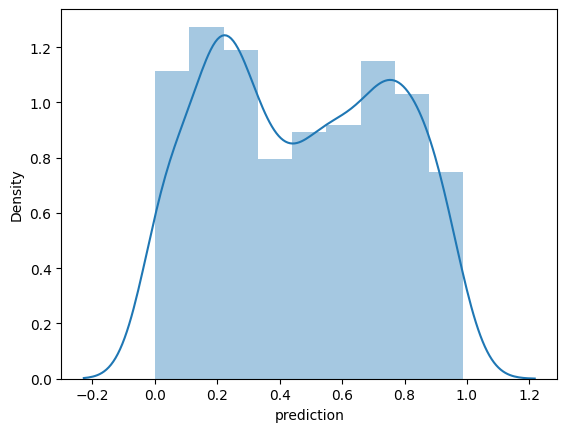

In [29]:
submission = pd.read_csv("1208_catboost_best.csv")
# reg_kf_submission = sample_submission.copy()
# reg_kf_submission['prediction'] = y_pred

# time = str(datetime.now(timezone('Asia/Seoul')).hour) + str(datetime.now(timezone('Asia/Seoul')).minute)
sns.distplot(submission['prediction'])
# plt.savefig("./"+time+".png")


/tmp/ipykernel_33955/2428565953.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(submission['prediction'])


<AxesSubplot: xlabel='prediction', ylabel='Density'>

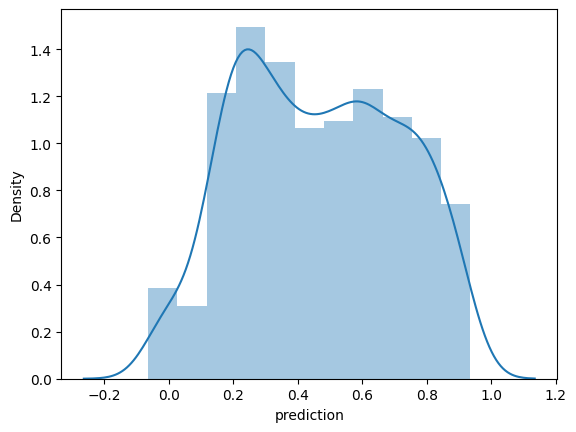

In [50]:
submission = pd.read_csv("/opt/ml/input/code/catboost/output/1208_cat_final.csv")
sns.distplot(submission['prediction'])


/tmp/ipykernel_33955/149782642.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(submission['prediction'])


<AxesSubplot: xlabel='prediction', ylabel='Density'>

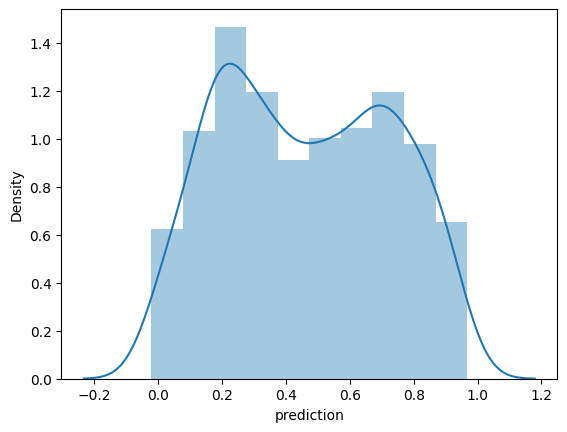

In [67]:
submission = pd.read_csv("/opt/ml/input/code/submit/ensemble1.csv")
sns.distplot(submission['prediction'])

/tmp/ipykernel_33955/2599198703.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(submission['prediction'])


<AxesSubplot: xlabel='prediction', ylabel='Density'>

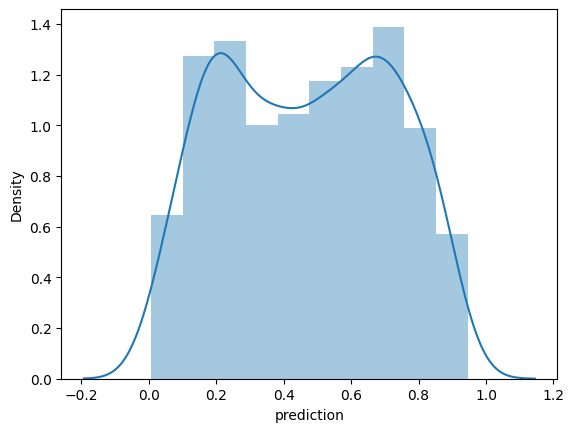

In [74]:
submission = pd.read_csv("/opt/ml/input/code/submit/ensemble5.csv")
sns.distplot(submission['prediction'])

/tmp/ipykernel_33955/451539094.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(submission['prediction'])


<AxesSubplot: xlabel='prediction', ylabel='Density'>

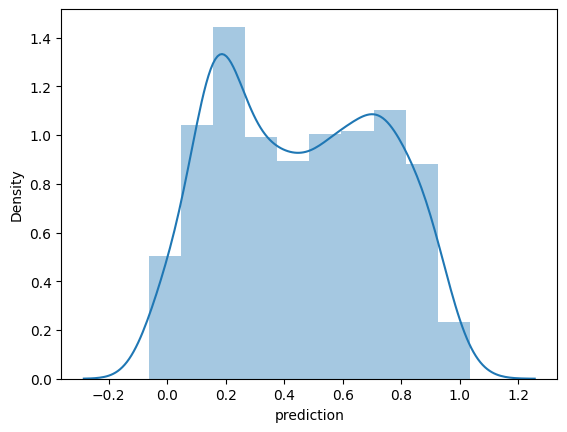

In [69]:
submission = pd.read_csv("/opt/ml/input/code/submit/lgbm_best.csv")
sns.distplot(submission['prediction'])

In [15]:
test.to_csv('/opt/ml/input/data/test_data3.csv', index=False)

In [46]:
best = pd.read_csv('1129_catboost_best.csv')

In [47]:
best

,id,prediction
0,0,0.687492
1,1,0.777806
2,2,0.253805
3,3,0.635540
4,4,0.335017
...,...,...
739,739,0.038963
740,740,0.737606
741,741,0.811814
742,742,0.693830


In [48]:
best['prediction'] = best['prediction'].where(best['prediction']>=0.5, 0)

In [49]:
best

,id,prediction
0,0,0.687492
1,1,0.777806
2,2,0.000000
3,3,0.635540
4,4,0.000000
...,...,...
739,739,0.000000
740,740,0.737606
741,741,0.811814
742,742,0.693830


In [50]:
best['prediction'] = best['prediction'].where(best['prediction']<0.5, 1)

In [51]:
best

,id,prediction
0,0,1.0
1,1,1.0
2,2,0.0
3,3,1.0
4,4,0.0
...,...,...
739,739,0.0
740,740,1.0
741,741,1.0
742,742,1.0
